In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [26]:
# load dataset
house_data = pd.read_csv("nigeria_houses_data.csv")

# view data head
house_data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [27]:
# check for missing data
house_data.isna().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [28]:
# check data info
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [29]:
house_data["price_log"] = np.log(house_data["price"])

In [30]:
house_data.describe()

,bedrooms,bathrooms,toilets,parking_space,price,price_log
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04,24326.000000
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08,18.350852
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10,1.056992
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04,11.407565
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07,17.766754
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07,18.258162
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08,18.890684
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12,28.218808


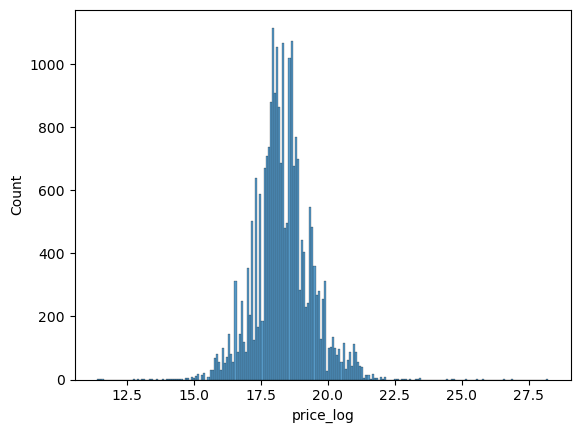

In [31]:
sns.histplot(data= house_data,
            x="price_log")

plt.show()

In [36]:
# extract the X and y feature
X_cat = house_data[['state', 'title']]
X_cat = pd.get_dummies(X_cat)
X_num = house_data.drop(columns=['price', 'price_log', 'state', 'town', 'title'])
X = pd.concat([X_num, X_cat], axis=1)

y = house_data['price_log']

# split data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


In [37]:
X_train.shape

(19460, 36)

In [38]:
# create Linear Regression Model
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [39]:
# make prediction from model
y_pred = model.predict(X_test)

In [40]:
# calculate root mean square error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.7880335859384003
